In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
n_grid = 200
x = np.linspace(-5, 5, n_grid)
h = x[1] - x[0]
D = -np.eye(n_grid) + np.diagflat(np.ones(n_grid-1), 1)
D /= h
D

array([[-19.9,  19.9,   0. , ...,   0. ,   0. ,   0. ],
       [  0. , -19.9,  19.9, ...,   0. ,   0. ,   0. ],
       [  0. ,   0. , -19.9, ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ..., -19.9,  19.9,   0. ],
       [  0. ,   0. ,   0. , ...,   0. , -19.9,  19.9],
       [  0. ,   0. ,   0. , ...,   0. ,   0. , -19.9]])

In [12]:
np.diagflat(np.ones(n_grid-1), 1)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
D2 = D.dot(-D.T)
D2[-1, -1] = D2[0, 0] # 端を処理
D2

array([[-792.02,  396.01,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [ 396.01, -792.02,  396.01, ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,  396.01, -792.02, ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ..., -792.02,  396.01,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,  396.01, -792.02,  396.01],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,  396.01, -792.02]])

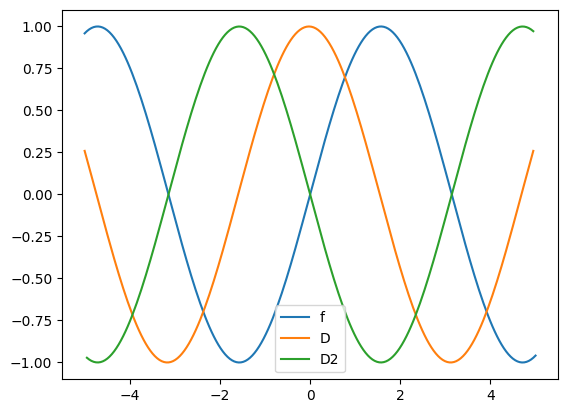

In [9]:
y = np.sin(x)
plt.plot(x, y, label="f")

# 微分して端を落とす
plt.plot(x[:-1], D.dot(y)[:-1], label="D")
plt.plot(x[1:-1], D2.dot(y)[1:-1], label="D2")
plt.legend()

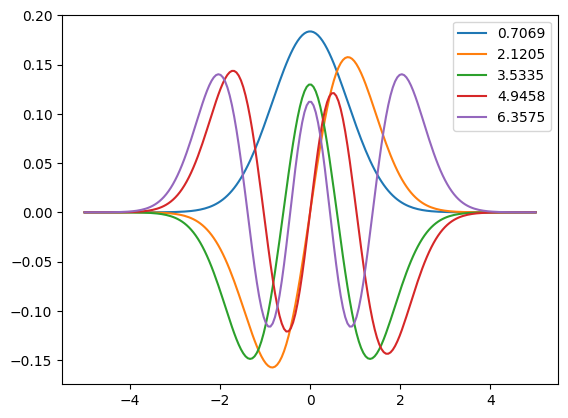

In [13]:
X = np.diagflat(x**2)
eig_harm, psi_harm = np.linalg.eigh(-D2/2+X)
for i in range(5):
    plt.plot(x, psi_harm[:, i],  label=f"{eig_harm[i]:.4f}")
    plt.legend(loc=1)

In [19]:
def integral(x, y, axis=0):
    dx = x[1] - x[0]
    return np.sum(y*dx, axis=axis)

def get_nx(num_electron, psi, x):
    # 規格化
    I = integral(x, psi**2, axis=0)
    normed_psi = psi / np.sqrt(I)[None, :]
    # occupation num
    fn = [2 for _ in range(num_electron // 2)]
    if num_electron % 2:
        fn.append(1)
    # density
    res = np.zeros_like(normed_psi[:, 0])
    for ne, psi in zip(fn, normed_psi.T):
        res += ne*(psi**2)
    return res

def get_exchange(nx, x):
    energy = -3./ 4 * (3./np.pi) ** (1./3) * integral(x, nx**(4./3))
    potential = -(3./np.pi) ** (1./3) * nx**(1./3)
    return energy, potential

def get_hatree(nx, x, eps=1e-1):
    h = x[1] - x[0]
    energy = np.sum(nx[None, :] * nx[:,None] * h**2 / np.sqrt((x[None, :]-x[:, None])**2 + eps) / 2)
    potential = np.sum(nx[None, :] * h / np.sqrt((x[None, :]-x[:, None])**2 + eps), axis=-1)
    return energy, potential


In [20]:
# max_iter回計算しても収束していなければ失敗
max_iter = 1000

# エネルギーの変化がenergy_tolerance以下ならば収束とする
energy_tolerance = 1e-8

# 電子密度初期化
nx = np.zeros(n_grid)

for i in range(max_iter):
    # ポテンシャルを求める
    ex_energy, ex_potential = get_exchange(nx, x)
    ha_energy, ha_potential = get_hatree(nx, x)

    # Hamiltonian
    H = -D2 / 2 + np.diagflat(ex_potential+ha_potential+x**2)

    # 波動関数を求める
    energy, psi = np.linalg.eigh(H)

    # 収束判定 -> もし収束していればおわり
    if abs(energy_diff) < energy_tolerance:
        print("converged!")
        break

    # 電子密度を更新する
    nx = get_nx(num_electron, psi, x)
else:
    print("not converged")

NameError: name 'energy_diff' is not defined